In [1]:
from __future__ import division
from copy import deepcopy as dc
import numpy as np
import time

In [30]:
class Random_Grid_Search:
    t_n = 200 #抽样量
    c_n = 50 #保留参数量
    threshold = 1e-6 #循环停止阈值
    orig_points = [] #初始化边界点
    k_list = np.arange(1,100)
    def __init__(self,d): #初始化实例参数
        self.para_range = []  #参数范围
        self.d = d
        self.para_range = [[0,3],[0,3]]  #用于产生边界节点的参数范围 
    
    def sample(self,c_range): #抽样参数点
        p_list = []
        for pa in c_range:
            x = (pa[1]-pa[0])*np.random.random(self.t_n) + pa[0]
            p_list.append(x)
        p_list = np.array(p_list).T
        return p_list.tolist()
    
    def f(self,params): #扩散函数
        a,b = params
        p_k = np.array([a*k**(-b) for k in self.k_list])
        x = abs(np.sum(p_k)-1)
        y = abs(np.sum(p_k*self.k_list)-self.d)
        return x+y
    
    def optima_search(self):
        orig_points = [[self.para_range[0][0],self.para_range[0][0]],[self.para_range[0][0],self.para_range[0][1]],
                                     [self.para_range[1][0],self.para_range[0][0]],[self.para_range[0][1],self.para_range[0][1]]]
        c_range = dc(self.para_range)
        samp = self.sample(c_range)
        solution = sorted([self.f(x)]+x for x in samp+orig_points)[:self.c_n]
        u = 1
        while 1:
            params_min = np.min(np.array(solution),0) #最小值
            params_max = np.max(np.array(solution),0) #最大值
            c_range = [[params_min[j+1],params_max[j+1]] for j in range(len(c_range))] #重新定界
            samp = self.sample(c_range)
            solution = sorted([[self.f(x)]+x for x in samp]+solution)[:self.c_n]
            r = [x[0] for x in solution]
            if np.min(r) < self.threshold:
                est = solution[np.argmin(r)]
                break
            if u > 100:
                print 'Searching ends in 100 runs'
                break
            u+=1
        return est  #sse,a,b
    
    def get_pk(self,params):
        a,b = params
        p_k = np.array([a*k**(-b) for k in self.k_list])
        return p_k

In [31]:
rgs = Random_Grid_Search(4)

In [32]:
for i in range(10):
    time1 = time.clock()
    print rgs.optima_search(),'%.3f  s'%(time.clock()-time1)

[5.6653480129398304e-07, 0.5603353537893043, 1.8531334579800882] 2.156  s
[8.1874716695296001e-07, 0.5603361973277804, 1.8531340760769426] 1.939  s
[3.8547313252479398e-07, 0.5603354683962101, 1.853133490171707] 2.112  s
[7.7794802399999696e-07, 0.5603361645154135, 1.8531340512411063] 1.971  s
[7.3847199111298778e-07, 0.5603353477063212, 1.8531334697054596] 1.977  s
[5.9761825133008983e-07, 0.5603357997429497, 1.8531337385334385] 2.122  s
[3.4227310352630269e-07, 0.5603354991738845, 1.8531335649157439] 2.050  s
[4.7312907658358938e-07, 0.5603358168969839, 1.8531337661940632] 2.292  s
[9.6365162960410089e-07, 0.5603349403163641, 1.8531331298699272] 2.010  s
[4.3071991906451501e-07, 0.5603353218420334, 1.853133394959591] 2.017  s


In [34]:
rgs.f([0.560335,1.853133])

2.1501480806929152e-06

In [13]:
%pylab inline
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


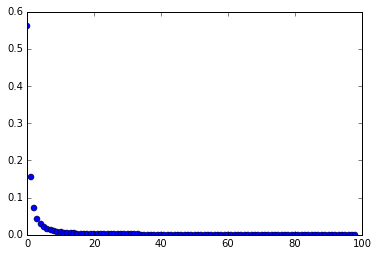

In [36]:
pl.plot(rgs.get_pk([0.560335,1.853133]),'bo')

In [18]:
from scipy.optimize import root

In [68]:
k_list = np.arange(1,100)
d = 3
def f(params,m=3,k_list=np.arange(1,100)): 
    a,b = params
    p_k = np.array([a*k**(-b) for k in k_list])
    return [sum(p_k)-1,sum(p_k*k_list)-m]

In [71]:
sol = root(f, [0.5, 1], args=(4,k_list),jac=False, method='lm')

In [76]:
for i in range(1000):
    m = 100*np.random.random()
    sol = root(f, [0.5, 1], args=(m,k_list),jac=False, method='lm')